In [1]:
import numpy as np
from numpy.ma import masked_values as maval
import gsw
import xarray as xr
import pandas as pd
import os.path as op
from datetime import datetime, timedelta
from scipy.interpolate import PchipInterpolator as pchip
from scipy.signal import medfilt
import dask.array as dsar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as ocean
from matplotlib import cm
import matplotlib.colors as clr
import matplotlib.ticker as tick
import matplotlib.path as mpath
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
comdir = '/swot/SUM02/takaya/SOCCOM/SIO'
limdir = '/swot/SUM03/Argo_BGC_backscatter_SO_merged'

In [3]:
pf = pd.read_csv(op.join(comdir,'../Fronts/pf.txt'), delim_whitespace=True, 
                 nrows=968, header=None, dtype=float, names=['lon','lat'])
saf = pd.read_csv(op.join(comdir,'../Fronts/saf.txt'), delim_whitespace=True, 
                 nrows=1079, header=None, dtype=float, names=['lon','lat'])

In [4]:
comC = pd.read_csv(op.join(comdir,'SOCCOM_Cs.csv'),
                  infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])
comR = pd.read_csv(op.join(comdir,'SOCCOM_rates.csv'),
                   infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])
limC = pd.read_csv(op.join(limdir,'../Argo_Analysis/SOCLIM_Cs.csv'),
                   infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])
limR = pd.read_csv(op.join(limdir,'../Argo_Analysis/SOCLIM_rates.csv'),
                   infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])

In [5]:
dC_COMCLIM = comC
dC_COMCLIM = pd.concat([dC_COMCLIM,limC],
                      ignore_index=True, sort=False)
dr_COMCLIM = comR
dr_COMCLIM = pd.concat([dr_COMCLIM,limR],
                      ignore_index=True, sort=False)

In [6]:
dC_mon = pd.DataFrame(data={'time':dC_COMCLIM.sort_values('time').time.astype('datetime64[M]').dropna()}
                     ).reset_index()

In [8]:
l = 0
m = 0
n = 0
ddeg = 0.
for i in range(len(dC_COMCLIM.time)):
    if np.isnan(dC_COMCLIM.Lon[i]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dC_COMCLIM.Lon[i]))
        k = np.argmin(np.abs(saf.lon-dC_COMCLIM.Lon[i]))
        d = {'time':[dC_COMCLIM.time[i]],
            'Lat':[dC_COMCLIM.Lat[i]], 'Lon':[dC_COMCLIM.Lon[i]], 
            'CH':[dC_COMCLIM.CH_rolled[i]]}

        if dC_COMCLIM.Lat[i]>=pf.lat[j]-ddeg and dC_COMCLIM.Lat[i]<=saf.lat[k]+ddeg:        
            if l == 0:
                accC = pd.DataFrame(data=d, index=[0])
            else:
                accC = pd.concat([accC,pd.DataFrame(data=d)], ignore_index=True)
            l += 1
        elif dC_COMCLIM.Lat[i]<pf.lat[j]-ddeg:
            if m == 0:
                saccC = pd.DataFrame(data=d, index=[0])
            else:
                saccC = pd.concat([saccC,pd.DataFrame(data=d)], ignore_index=True)
            m += 1
        elif dC_COMCLIM.Lat[i]>saf.lat[k]+ddeg:
            if n == 0:
                naccC = pd.DataFrame(data=d, index=[0])
            else:
                naccC = pd.concat([naccC,pd.DataFrame(data=d)], ignore_index=True)
            n += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [10]:
l = 0
m = 0
n = 0
ddeg = 0.
for i in range(len(dC_COMCLIM.time)):
    if np.isnan(dC_COMCLIM.Lon[i]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dC_COMCLIM.Lon[i]))
        k = np.argmin(np.abs(saf.lon-dC_COMCLIM.Lon[i]))
        d = {'time':[dC_COMCLIM.time[i]],
            'Lat':[dC_COMCLIM.Lat[i]], 'Lon':[dC_COMCLIM.Lon[i]], 
            'CH':[dC_COMCLIM.CH_rolled[i]]}
        
        if dC_COMCLIM.Lat[i]>=-60 and dC_COMCLIM.Lat[i]<=-50:        
            if l == 0:
                C56 = pd.DataFrame(data=d, index=[0])
            else:
                C56 = pd.concat([C56,pd.DataFrame(data=d)], ignore_index=True)
            l += 1
        elif dC_COMCLIM.Lat[i]<-60:
            if m == 0:
                C6 = pd.DataFrame(data=d, index=[0])
            else:
                C6 = pd.concat([C6,pd.DataFrame(data=d)], ignore_index=True)
            m += 1
        elif dC_COMCLIM.Lat[i]>-50:
            if n == 0:
                C5 = pd.DataFrame(data=d, index=[0])
            else:
                C5 = pd.concat([C5,pd.DataFrame(data=d)], ignore_index=True)
            n += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [13]:
l = 0
m = 0
n = 0
for i in range(len(dr_COMCLIM.time)):
    if np.isnan(dr_COMCLIM.Lon_rolled[i]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dr_COMCLIM.Lon_rolled[i]))
        k = np.argmin(np.abs(saf.lon-dr_COMCLIM.Lon_rolled[i]))
#         print(j,k)
        d = {'time':[dr_COMCLIM.time[i]],
            'Lat':[dr_COMCLIM.Lat_rolled[i]], 'Lon':[dr_COMCLIM.Lon_rolled[i]], 
            'r':[dr_COMCLIM.rPH[i]]}
        if dr_COMCLIM.Lat_rolled[i]>=-60. and dr_COMCLIM.Lat_rolled[i]<=-50.:
            if l == 0:
                r56 = pd.DataFrame(data=d, index=[0])
            else:
                r56 = pd.concat([r56,pd.DataFrame(data=d)], ignore_index=True)
            l += 1
        elif dr_COMCLIM.Lat_rolled[i]<-60:
            if m == 0:
                r6 = pd.DataFrame(data=d, index=[0])
            else:
                r6 = pd.concat([r6,pd.DataFrame(data=d)], ignore_index=True)
            m += 1
        elif dr_COMCLIM.Lat_rolled[i]>-50:
            if n == 0:
                r5 = pd.DataFrame(data=d, index=[0])
            else:
                r5 = pd.concat([r5,pd.DataFrame(data=d)], ignore_index=True)
            n += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [14]:
nordC = naccC.where(naccC.CH.notna()).dropna(thresh=3)
C_5 = C5.where(C5.CH.notna()).dropna(thresh=3)
r_5 = r5.where(r5.r.notna()).dropna(thresh=3)

midC = accC.where(accC.CH.notna()).dropna(thresh=3)
C5_6 = C56.where(C56.CH.notna()).dropna(thresh=3)
r5_6 = r56.where(r56.r.notna()).dropna(thresh=3)

sudC = saccC.where(saccC.CH.notna()).dropna(thresh=3)
C6_ = C6.where(C6.CH.notna()).dropna(thresh=3)
r6_ = r6.where(r6.r.notna()).dropna(thresh=3)


nordC = nordC.sort_values('time').set_index('time')
C_5 = C_5.sort_values('time').set_index('time')
r_5 = r_5.sort_values('time').set_index('time')
midC = midC.sort_values('time').set_index('time')
C5_6 = C5_6.sort_values('time').set_index('time')
r5_6 = r5_6.sort_values('time').set_index('time')
sudC = sudC.sort_values('time').set_index('time')
C6_ = C6_.sort_values('time').set_index('time')
r6_ = r6_.sort_values('time').set_index('time')

In [15]:
nordC_m = nordC.resample('M').median()
C_5m = C_5.resample('M').median()
r_5m = r_5.resample('M').median()

midC_m = midC.resample('M').median()
C5_6m = C5_6.resample('M').median()
r5_6m = r5_6.resample('M').median()

sudC_m = sudC.resample('M').median()
C6_m = C6_.resample('M').median()
r6_m = r6_.resample('M').median()

In [16]:
grouped = dC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        totdata = np.array([len(group[1])])
    else:
        totdata = np.append(totdata, np.array([len(group[1])]))
    i += 1

In [17]:
nordC_mon = pd.DataFrame(data={'time':nordC.reset_index().time.astype('datetime64[M]')})
grouped = nordC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        nordata = np.array([len(group[1])])
    else:
        nordata = np.append(nordata, np.array([len(group[1])]))
    i += 1

In [18]:
midC_mon = pd.DataFrame(data={'time':midC.reset_index().time.astype('datetime64[M]')})
grouped = midC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        midata = np.array([len(group[1])])
    else:
        midata = np.append(midata, np.array([len(group[1])]))
    i += 1

In [19]:
sudC_mon = pd.DataFrame(data={'time':sudC.reset_index().time.astype('datetime64[M]')})
grouped = sudC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        sudata = np.array([len(group[1])])
    else:
        sudata = np.append(sudata, np.array([len(group[1])]))
    i += 1

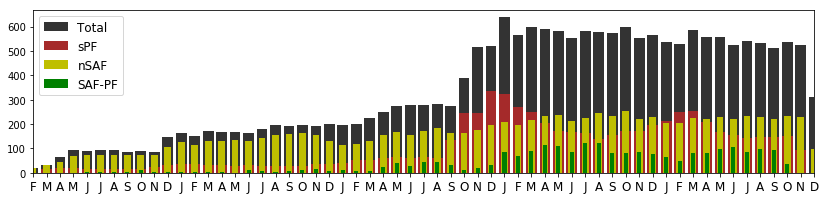

In [20]:
months = np.append(np.array(['F','M','A','M','J','J','A','S','O','N','D']), 
                   np.tile(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),4))

fig, ax = plt.subplots(figsize=(14,3))
ax.bar(range(len(totdata)), totdata, color='k', alpha=.8, label=r'Total')
ax.bar(range(1,len(sudata)+1), sudata, color='brown', width=0.8, label=r'sPF')
ax.bar(range(len(nordata)), nordata, color='y', width=0.5, label=r'nSAF')
ax.bar(range(4,len(midata)+4), midata, color='g', width=0.3, label=r'SAF-PF')
# ax.scatter(range(1,len(sudata)+1), sudata, c='brown', s=8.)
ax.set_xticks(np.arange(len(totdata)))
ax.set_xticklabels(months, fontsize=12)
ax.set_xlim([0,len(totdata)-1])
ax.legend(loc='upper left', fontsize=12)

In [39]:
grouped = dC_mon.time.groupby(dC_mon.time.dt.month)

i = 0
for group in grouped:
    if i == 0:
        totdata_m = np.array([len(group[1])])
    else:
        totdata_m = np.append(totdata_m, np.array([len(group[1])]))
    i += 1

In [23]:
topo = xr.open_dataset('/home/rdussin/etopo5.nc')
lon = topo.topo_lon.data
lon[lon<0] += 360
topo = xr.DataArray(topo.topo.data, dims=['lat','lon'],
                   coords={'lat':topo.topo_lat.data,'lon':lon})
topoSO = topo.isel(lat=slice(0,800))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


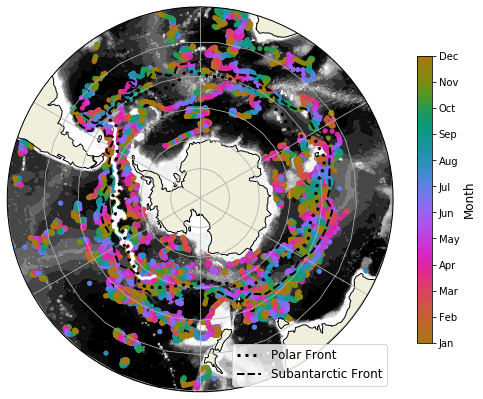

In [24]:
ds = xr.open_dataset(op.join(comdir,'5904185_Mprof.nc'))
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

cs = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO<0.), cmap='binary_r',
               levels=np.linspace(-5000,-200,10), extend='both',
               transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
im = ax.scatter(comC.Lon.values, comC.Lat.values, 
               s=18., c=comC.time.dt.month, cmap=ocean.cm.phase,
               vmin=1, vmax=12, alpha=1.,
               transform=ccrs.PlateCarree(), rasterized=True)
ax.scatter(limC.Lon.values, limC.Lat.values, 
          s=18., c=limC.time.dt.month, cmap=ocean.cm.phase,
          vmin=1, vmax=12, alpha=1.,
          transform=ccrs.PlateCarree(), rasterized=True)
ax.plot(ds.groupby('JULD').mean().LONGITUDE.values, ds.groupby('JULD').mean().LATITUDE.values, 
        c='w', lw=3,
        transform=ccrs.PlateCarree())
ax.plot(pf.lon, pf.lat, 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat, 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower right', fontsize=12)

cbar = fig.colorbar(im, ax=ax, shrink=.7, ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
cbar.set_ticklabels(np.roll(np.asarray(['Jan','Feb','Mar','Apr','May','Jun',
                                        'Jul','Aug','Sep','Oct','Nov','Dec']), -0))
cbar.set_label(r"Month", fontsize=12)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


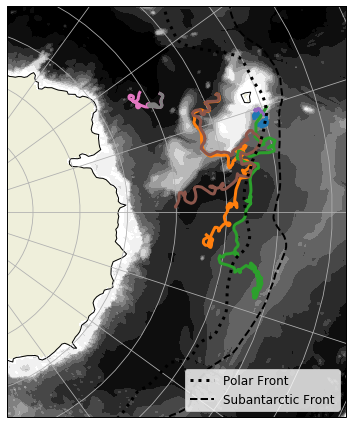

In [25]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo(central_longitude=0.0))
ax.set_extent([60, 120, -80, -40], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)

cs = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO<0.), cmap='binary_r',
               levels=np.linspace(-5000,-200,10), extend='both',
               transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
for i in limC.floatID.unique():
    ax.plot(limC.where(limC.floatID==i).Lon.values, limC.where(limC.floatID==i).Lat.values, 
           transform=ccrs.PlateCarree(), rasterized=True, lw=3)

ax.plot(pf.lon, pf.lat, 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat, 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower right', fontsize=12)

In [26]:
xbins = np.arange(-180,190,10)
ybins = np.arange(-80,-20,10)
nDATA = xr.DataArray(np.zeros_like(ybins)[:,np.newaxis]*xbins, dims=['lat','lon'],
                     coords={'lat':ybins,'lon':xbins})

for i in range(len(dC_COMCLIM.CH_rolled)):
    if ~np.isnan(dC_COMCLIM.CH_rolled[i]) and ~np.isnan(dC_COMCLIM.Lat[i]) and ~np.isnan(dC_COMCLIM.Lon[i]):
        ix = np.nanargmin(np.abs(xbins-dC_COMCLIM.Lon.data[i]))
        iy = np.nanargmin(np.abs(ybins-dC_COMCLIM.Lat.data[i]))
        if dC_COMCLIM.Lon.data[i]<xbins[ix]:
            if dC_COMCLIM.Lat.data[i]<ybins[iy]:
                nDATA[iy-1,ix-1] += 1
            else:
                nDATA[iy,ix-1] += 1
        else:
            if dC_COMCLIM.Lat.data[i]<ybins[iy]:
                nDATA[iy-1,ix] += 1
            else:
                nDATA[iy,ix] += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.data is deprecated and will be removed in a future version
  if __name__ == '__main__':
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.data is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Series.data is deprecated and will be removed in a future version
  app.launch_new_instance()
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.data is deprecated and will be removed in a future version
  # This is added back 

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


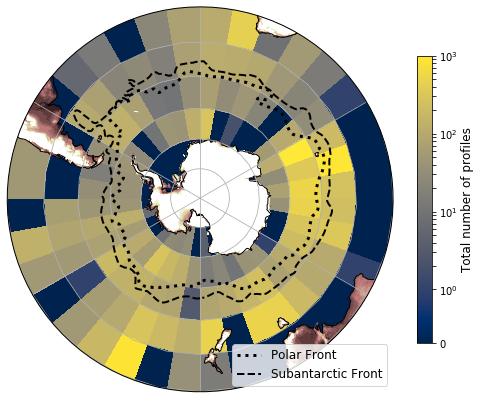

In [27]:
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

im = ax.pcolormesh(nDATA.lon, nDATA.lat, nDATA, 
                  rasterized=True, norm=clr.SymLogNorm(linthresh=1, vmin=0, vmax=1000),
                  cmap='cividis', transform=ccrs.PlateCarree())
cs = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO>0.), cmap='pink',
               levels=np.linspace(0,1000,20), extend='both',
               transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
ax.plot(pf.lon, pf.lat, 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat, 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower right', fontsize=12)

cbar = fig.colorbar(im, ax=ax, shrink=.7)
cbar.set_label(r"Total number of profiles", fontsize=12)

In [28]:
grouped = nordC_mon.groupby(nordC_mon.time.dt.month)
i = 0
for group in grouped:
    if i == 0:
        nordata_m = np.array([len(group[1])])
    else:
        nordata_m = np.append(nordata_m, np.array([len(group[1])]))
    i += 1

In [29]:
grouped = midC_mon.groupby(midC_mon.time.dt.month)
i = 0
for group in grouped:
    if i == 0:
        midata_m = np.array([len(group[1])])
    else:
        midata_m = np.append(midata_m, np.array([len(group[1])]))
    i += 1

In [30]:
grouped = sudC_mon.groupby(sudC_mon.time.dt.month)
i = 0
for group in grouped:
    if i == 0:
        sudata_m = np.array([len(group[1])])
    else:
        sudata_m = np.append(sudata_m, np.array([len(group[1])]))
    i += 1

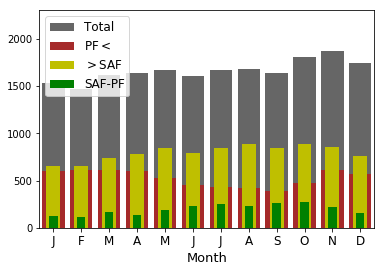

In [31]:
fig, ax = plt.subplots()
ax.bar(range(12), totdata_m, color='k', alpha=.6, label=r"Total")
ax.bar(range(12), sudata_m, color='brown', width=0.8, label=r"PF$<$")
ax.bar(range(12), nordata_m, color='y', width=0.5, label=r"$>$SAF")
ax.bar(range(12), midata_m, color='g', width=0.3, label=r"SAF-PF")
ax.set_xticks(range(12))
ax.set_xticklabels(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']), fontsize=12)
ax.set_xlabel(r"Month", fontsize=13)
ax.set_xlim([-.5,11.5])
ax.set_ylim([0,2300])
ax.legend(loc='upper left', fontsize=12)

In [239]:
chlMLn_m = nordb.where(nordb.ChlML>0.).dropna(thresh=3).resample('M').median()
chlMLm_m = midb.where(midb.ChlML>0.).dropna(thresh=3).resample('M').median()
chlMLs_m = sudb.where(sudb.ChlML>0.).dropna(thresh=3).resample('M').median()
chlMLn_m

,AOU,Chl,Chl100,ChlML,Cphyto,Lat,Lon
time,,,,,,,
2014-02-28,9.710623,NaN,0.199347,22.687500,13.986485,52.5350,-34.6570
2014-03-31,10.163311,NaN,0.260071,21.191500,15.909837,52.7235,-30.7385
2014-04-30,11.416668,NaN,0.432757,23.638450,29.378930,53.0900,-26.9310
2014-05-31,2.959929,NaN,0.632191,24.317149,51.102608,52.3515,-24.6065
2014-06-30,7.494815,NaN,0.723055,11.467500,45.609224,53.1680,-22.8325
2014-07-31,18.124432,NaN,0.914302,21.557800,47.307648,54.1130,-22.0370
2014-08-31,22.026875,NaN,0.717885,17.153400,26.913847,52.2920,-20.7435
2014-09-30,26.374690,NaN,0.553712,15.423650,25.586891,52.9050,-18.0770
2014-10-31,22.056586,NaN,0.454735,16.886650,21.844242,52.7105,-15.6720


In [32]:
C_5m_25 = C_5.resample('M').quantile(q=.25)
C_5m_75 = C_5.resample('M').quantile(q=.75)
C_56m_25 = C5_6.resample('M').quantile(q=.25)
C_56m_75 = C5_6.resample('M').quantile(q=.75)
C_6m_25 = C6_.resample('M').quantile(q=.25)
C_6m_75 = C6_.resample('M').quantile(q=.75)

r_5m_25 = r_5.resample('M').quantile(q=.25)
r_5m_75 = r_5.resample('M').quantile(q=.75)
r_56m_25 = r5_6.resample('M').quantile(q=.25)
r_56m_75 = r5_6.resample('M').quantile(q=.75)
r_6m_25 = r6_.resample('M').quantile(q=.25)
r_6m_75 = r6_.resample('M').quantile(q=.75)

In [33]:
Cphyto_n = np.append(np.array([np.nan]),C_5m.CH.data).reshape((5,12))
Cphyto_m = np.append(np.array([np.nan,np.nan,np.nan]),C5_6m.CH.data).reshape((5,12))
Cphyto_s = np.append(np.array([np.nan,np.nan,np.nan]),C6_m.CH.data).reshape((5,12))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


Text(0, 0.5, '$r_P$ [d$^{-1}$]')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


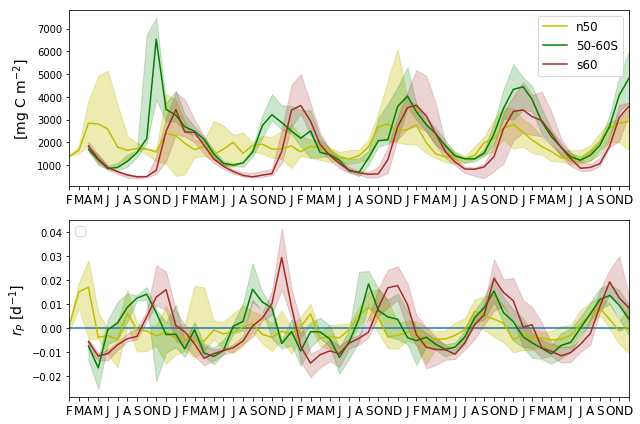

In [34]:
months = np.append(np.array(['F','M','A','M','J','J','A','S','O','N','D']), 
                   np.tile(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),4))
fig, (ax1,ax4) = plt.subplots(nrows=2,ncols=1,figsize=(9,6))
fig.set_tight_layout(True)

ax1.plot(C_5m.reset_index().time, C_5m.CH, c='y', label=r"n50")
ax1.fill_between(C_5m.reset_index().time, C_5m_75.CH, C_5m_25.CH, color='y', alpha=.3)
ax1.plot(C5_6m.reset_index().time, C5_6m.CH, c='g', label=r"50-60S")
ax1.fill_between(C5_6m.reset_index().time, C_56m_75.CH, C_56m_25.CH, color='g', alpha=.2)
ax1.plot(C6_m.reset_index().time, C6_m.CH, c='brown', label=r"s60")
ax1.fill_between(C6_m.reset_index().time, C_6m_75.CH, C_6m_25.CH, color='brown', alpha=.2)

ax4.plot(r_5m.reset_index().time, np.zeros_like(r_5m.r))
ax4.plot(r_5m.reset_index().time, r_5m.r*86400, c='y', label=r"")
ax4.fill_between(r_5m.reset_index().time, r_5m_75.r*86400, r_5m_25.r*86400, color='y', alpha=.3)
ax4.plot(r5_6m.reset_index().time, r5_6m.r*86400, c='g', label=r"")
ax4.fill_between(r5_6m.reset_index().time, r_56m_75.r*86400, r_56m_25.r*86400, color='g', alpha=.2)
ax4.plot(r6_m.reset_index().time, r6_m.r*86400, c='brown', label=r"")
ax4.fill_between(r6_m.reset_index().time, r_6m_75.r*86400, r_6m_25.r*86400, color='brown', alpha=.2)
ax1.set_xlim([C_5m.index[0],C_5m.index[-1]])
ax4.set_xlim([C_5m.index[0],C_5m.index[-1]])
ax1.set_xticks(C_5m.index)
ax4.set_xticks(C_5m.index)

ax1.set_xticklabels(months, fontsize=12)
ax1.legend(loc='upper right', fontsize=12)
ax4.set_xticklabels(months, fontsize=12)
ax4.legend(loc='upper left', fontsize=12)
ax1.set_ylabel(r'[mg C m$^{-2}$]', fontsize=14)
ax4.set_ylabel(r'$r_P$ [d$^{-1}$]', fontsize=14)

In [35]:
r_n = np.append(np.array([np.nan]),r_5m.r.data).reshape((5,12))
r_m = np.append(np.array([np.nan,np.nan,np.nan]),r5_6m.r.data).reshape((5,12))
r_s = np.append(np.array([np.nan,np.nan,np.nan]),r6_m.r.data).reshape((5,12))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Month')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


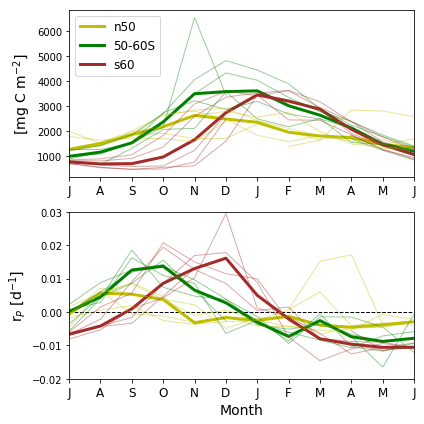

In [38]:
months = np.array(['J','F','M','A','M','J','J','A','S','O','N','D'])

fig, (ax3,ax7) = plt.subplots(nrows=2,ncols=1,figsize=(6,6))
fig.set_tight_layout(True)
    
ax3.plot(range(12), np.roll(np.nanmedian(Cphyto_n,axis=0),6), c='y', lw=3, label=r"n50")
ax3.plot(range(12), np.roll(np.nanmedian(Cphyto_m,axis=0),6), c='g', lw=3, label=r"50-60S")
ax3.plot(range(12), np.roll(np.nanmean(Cphyto_s,axis=0),6), c='brown', lw=3, label=r"s60")
ax7.plot(np.zeros(12), 'k--', lw=1)
ax7.plot(range(12), np.roll(np.nanmedian(r_n,axis=0),6)*86400, c='y', lw=3, label=r"n50")
ax7.plot(range(12), np.roll(np.nanmedian(r_m,axis=0),6)*86400, c='g', lw=3, label=r"50-60S")
ax7.plot(range(12), np.roll(np.nanmedian(r_s,axis=0),6)*86400, c='brown', lw=3, label=r"s60")
for i in range(5):
    ax3.plot(range(12), np.roll(Cphyto_n[i],6), c='y', lw=1, alpha=.4)
    ax3.plot(range(12), np.roll(Cphyto_m[i],6), c='g', lw=1, alpha=.4)
    ax3.plot(range(12), np.roll(Cphyto_s[i],6), c='brown', lw=1, alpha=.4)
    ax7.plot(range(12), np.roll(r_n[i]*86400,6), c='y', lw=1, alpha=.4)
    ax7.plot(range(12), np.roll(r_m[i]*86400,6), c='g', lw=1, alpha=.4)
    ax7.plot(range(12), np.roll(r_s[i]*86400,6), c='brown', lw=1, alpha=.4)

ax3.set_xlim([0,11])
ax7.set_xlim([0,11])
ax7.set_ylim([-.02,.03])
ax3.set_xticks(range(12))
ax7.set_xticks(range(12))
ax3.set_xticklabels(np.roll(months,6), fontsize=12)
ax3.legend(loc='upper left', fontsize=12)
ax7.set_xticklabels(np.roll(months,6), fontsize=12)
ax3.set_ylabel(r'[mg C m$^{-2}$]', fontsize=14)
ax7.set_ylabel(r'r$_P$ [d$^{-1}$]', fontsize=14)
ax7.set_xlabel(r'Month', fontsize=14)